<a href="https://colab.research.google.com/github/swarubm/Deep-Learning-/blob/main/DL04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Build and demonstrate an autoencoder network using neural layers for data
compression on image dataset.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 63s 259ms/step - loss: 0.1488 - val_loss: 0.1140
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 253ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 60s 255ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 253ms/step - loss: 0.1123 - val_loss: 0.1140
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 90s 286ms/step - loss: 0.1119 - val_loss: 0.1140
Test Loss (MSE): 0.113958
Sample reconstructed image shape: (10000, 28, 28, 1)


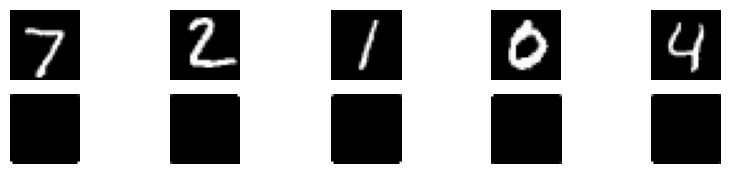

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
tf.config.set_visible_devices([], 'GPU')
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
autoencoder = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, validation_data=(x_test, x_test),
                verbose=1)
test_loss = autoencoder.evaluate(x_test, x_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.6f}")
reconstructed = autoencoder.predict(x_test, verbose=0)
print("Sample reconstructed image shape:", reconstructed.shape)
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i+6)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()